## Nigerian Currency : Naïra bank notes Classification.

- #### Goal: Using the [fast.ai](http://fast.ai) library, we are going to build a model to classifiy Nigerian currency (Naïra) bank notes.
- #### Dataset : provided by [Kenechi Franklin Dukor](https://kennydukor.github.io/).

In [79]:
#Allow automatic reloading
%reload_ext autoreload
%autoreload 2

#Allow inline plotting: all plots done with matplotlib will be plotted directly below the code cells, and also stored in the notebook document.
%matplotlib inline

In [80]:
#Useful components form fast.ai for our model.
from fastai.imports import *

from fastai.conv_learner import *
from fastai.dataset import *
from fastai.plots import *
from fastai.sgdr import *
from fastai.transforms import *
from fastai.model import *

#### >> ***__Are CUDA framework and CuDNN package (contains special accelerated functions for DL) up and running__*** ?

In [382]:
f"cuda: Cuda framework is up and running: {torch.cuda.is_available()}"

'cuda: Cuda framework is up and running: True'

In [383]:
f"CuDNN: CuDnn package is enabled: {torch.backends.cudnn.enabled}"

'CuDNN: CuDnn package is enabled: True'

#### >> ***__Model features__***

In [82]:
# Path tothe data
path = 'data/nigerianCurrencies'

In [83]:
# Neural network features
archit = resnext50
sz = 224
bs = 10

### >> ***Data understanding***

In [390]:
print('* bank notes iamges are located in: \" %s\" ' %path)
os.listdir(path)

* bank notes iamges are located in: " data/nigerianCurrencies" 


['train', 'test1', 'tmp', 'sample', 'models', 'model', 'valid']

a- Exploring TRAINING dataset

In [391]:
f"* list of bank notes CATEGORIES in the training set: {os.listdir(f'{path}/train')}"

"* list of bank notes CATEGORIES in the training set: ['N20', 'N1000', 'N500', 'N100', 'N10', 'N5', 'N200', 'N50']"

In [86]:
print('Number of bank notes images of each category to train the model:\n')
print('\t* 5 Naïra: %s;' %len(os.listdir(f'{path}/train/N5')))
print('\t* 10 Naïra: %s;' %len(os.listdir(f'{path}/train/N10')))
print('\t* 20 Naïra: %s;' %len(os.listdir(f'{path}/train/N20')))

Number of bank notes images of each category to train the model:

	* 5 Naïra: 32;
	* 10 Naïra: 32;
	* 20 Naïra: 32;


In [406]:
f"first 5 bank notes of 5 Naïra for training purposes: {os.listdir(f'{path}/train/N5')[:5]}"

"first 5 bank notes of 5 Naïra for training purposes: ['09.jpg', '32.jpg', '23.jpg', '26.jpg', '03.jpg']"

b- Exploring VALIDATION dataset

In [88]:
print('* list of bank notes CATEGORIES in the validation set: %s' %(os.listdir(f'{path}/valid')))

* list of bank notes CATEGORIES in the validation set: ['N20', 'N1000', 'N500', 'N100', 'N10', 'N5', 'N200', 'N50']


In [89]:
print('Number of bank notes images of each category to validate the model: \n')
print('\t* 5 Naïra: %s;' %len(os.listdir(f'{path}/valid/N5')))
print('\t* 10 Naïra: %s;' %len(os.listdir(f'{path}/valid/N10')))
print('\t* 1000 Naïra: %s' %len(os.listdir(f'{path}/valid/N1000')))

Number of bank notes images of each category to validate the model: 

	* 5 Naïra: 15;
	* 10 Naïra: 15;
	* 1000 Naïra: 15


In [90]:
print('first 5 bank notes images of 5 Naïra for validation purposes: %s' %(os.listdir(f'{path}/valid/N5'))[:5])

first 5 bank notes images of 5 Naïra for validation purposes: ['09.jpg', '32.jpg', '23.jpg', '26.jpg', '31.jpg']


In [91]:
files = os.listdir(f'{path}/valid/N5')[:5]
files

['09.jpg', '32.jpg', '23.jpg', '26.jpg', '31.jpg']

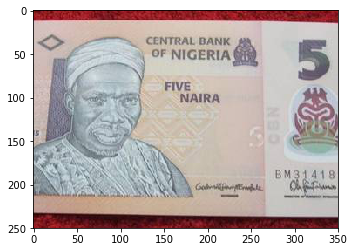

In [92]:
#read the second image in the validation set
val_img_0 = plt.imread(f'{path}/valid/N5/{files[0]}')
plt.imshow(val_img_0);

In [93]:
val_img_0.size

262500

In [94]:
val_img_0.shape

(250, 350, 3)

In [95]:
val_img_0[:2, :3]

array([[[129,  36,  29],
        [112,  19,  14],
        [100,   6,   4]],

       [[139,  44,  38],
        [124,  29,  25],
        [109,  14,  12]]], dtype=uint8)

 **Notes on above: ** Our currency dataset shows a ratio of 15 / 32 ... the validation set is  50 % of the training set.

### ***Let us now build our Classifier !***

### ***  1/- Without Data Augmentation***

In [96]:
tfms = tfms_from_model(archit, sz)
data = ImageClassifierData.from_paths(path, bs=bs, tfms=tfms)
learn = ConvLearner.pretrained(archit, data)

In [97]:
# Optimal learning rate through Learning rate finder
lrf = learn.lr_find()

 92%|█████████▏| 24/26 [00:04<00:00,  5.95it/s, loss=4.36]


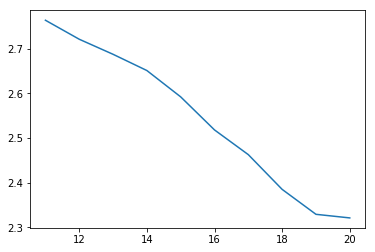

In [132]:
learn.sched.plot_loss()

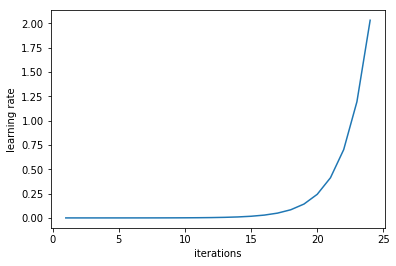

In [100]:
learn.sched.plot_lr()

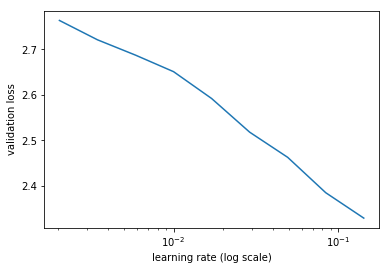

In [133]:
learn.sched.plot()

In [101]:
# our learning rate shoul be somewhere between 1e-2 and 1e-1
lr = 0.01

In [102]:
learn.fit(lr, 3)

epoch      trn_loss   val_loss   accuracy   
    0      1.715736   0.41925    0.875     
    1      1.030992   0.175984   0.95      
    2      0.757789   0.083566   0.975     



[array([0.08357]), 0.9749999940395355]

In [103]:
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.377057   0.076735   0.975     
    1      0.259685   0.040686   0.991667  
    2      0.22681    0.037616   0.991667  



[array([0.03762]), 0.9916666646798452]

In [104]:
learn.unfreeze()

In [105]:
#set differential learning rates
dlr = np.array([lr/100 ,lr/10 ,lr])
dlr

array([0.0001, 0.001 , 0.01  ])

In [106]:
learn.fit(dlr, 3)

epoch      trn_loss   val_loss   accuracy   
    0      0.890019   0.181679   0.925     
    1      0.622748   0.046668   0.983333  
    2      0.551292   0.056624   0.983333  



[array([0.05662]), 0.9833333293596903]

In [108]:
learn.fit(dlr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.10045    0.018287   0.991667  
    1      0.086283   0.014844   0.991667  
    2      0.098118   0.02244    0.991667  



[array([0.02244]), 0.9916666646798452]

In [111]:
learn.save('224_r50_lalay_noTfms')

In [112]:
learn.load('224_r50_lalay_noTfms')

### ***2/- Adding Transformations hoping for model improvment***

In [166]:
tfms = tfms_from_model(archit, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(path, bs=bs, tfms=tfms, num_workers=4)
learn_da = ConvLearner.pretrained(archit, data, ps=0.5)      #_da :: data augmentation.

In [167]:
lrf = learn_da.lr_find()

 96%|█████████▌| 25/26 [00:04<00:00,  5.05it/s, loss=8.09]


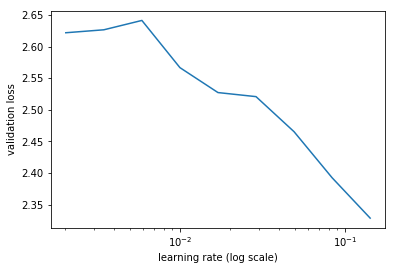

In [168]:
learn_da.sched.plot()

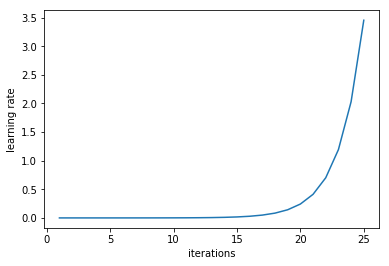

In [169]:
learn_tf.sched.plot_lr()

In [170]:
lr_da = 0.01

In [171]:
learn_da.fit(lr_da, 3)

epoch      trn_loss   val_loss   accuracy   
    0      1.705401   0.495659   0.866667  
    1      1.121846   0.186173   0.95      
    2      0.86228    0.162368   0.966667  



[array([0.16237]), 0.9666666636864344]

In [172]:
learn_da.unfreeze()

In [174]:
dlr_da = np.array([lr/100 ,lr/10 ,lr])
dlr_da

array([0.0001, 0.001 , 0.01  ])

In [175]:
learn_da.fit(dlr_da, 3)

epoch      trn_loss   val_loss   accuracy   
    0      0.870899   0.153029   0.95      
    1      0.65304    0.069872   0.975     
    2      0.482148   0.043935   0.991667  



[array([0.04394]), 0.9916666646798452]

In [177]:
learn_da.fit(dlr_da, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.152045   0.017834   0.991667  
    1      0.115954   0.014596   0.991667  



[array([0.0146]), 0.9916666646798452]

In [178]:
learn.save('224_r50_naïra_All_layers')

In [179]:
learn.load('224_r50_naïra_All_layers')

In [417]:
#logarithmic predictions
log_preds_da, y = learn_da.TTA()

In [434]:
log_preds_da.shape

(5, 120, 8)

In [419]:
len(log_preds_da)

5

In [420]:
len(y)

120

In [421]:
#Exponential predictions : probabilities : Through Test Time Augmentation TTA(), take the average of exponential predictions of original and transformed of images.
probabilities_da = np.mean(np.exp(log_preds_da), 0)

In [423]:
len(probabilities_da)

120

In [424]:
#Model accuracy
model_accur = accuracy_np(probabilities_da, y)
model_accur

0.9916666666666667

##### *__A little function to manage floating decimals:__* this helps in shrinking the floating point to present the result as we want.

In [425]:
def floating_decimals(f_val, dec):
    prc = "{:."+str(dec)+"f}"   #first cast decimal as string
    #print(prc) # strformat output is {:.3f}
    return prc.format(f_val)

In [426]:
#Shrinking our model accuracy result to 2 floating points.
model_accur = floating_decimals(model_accur*100, 2)
model_accur

'99.17'

In [427]:
 F"Our Naïra bank notes\' classifier can perform with {model_accur}% accuracy."

"Our Naïra bank notes' classifier can perform with 99.17% accuracy."

### **Let us explore the results**

In [428]:
preds_da = np.argmax(probabilities_da, axis=1)

In [429]:
probabilities_da = probabilities_da[:,1]

In [430]:
probabilities_da

array([0.01372, 0.00009, 0.00026, 0.00004, 0.00049, 0.00095, 0.00007, 0.00019, 0.00006, 0.00697, 0.00203,
       0.00082, 0.00072, 0.00037, 0.01223, 0.99864, 0.99999, 0.99992, 0.99999, 0.99999, 0.99978, 1.     ,
       0.99988, 0.99985, 1.     , 1.     , 0.99994, 0.99998, 0.99998, 1.     , 0.01515, 0.     , 0.00002,
       0.00001, 0.00003, 0.00002, 0.00019, 0.     , 0.     , 0.     , 0.     , 0.00001, 0.00031, 0.00004,
       0.     , 0.00031, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.00001, 0.     ,
       0.     , 0.00003, 0.     , 0.     , 0.0001 , 0.     , 0.     , 0.     , 0.00001, 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.00003, 0.00145, 0.00001,
       0.00013, 0.00001, 0.     , 0.00001, 0.00001, 0.     , 0.00002, 0.     , 0.23984, 0.00002, 0.00001,
       0.00007, 0.00033, 0.00001, 0.00001, 0.00042, 0.00016, 0.     , 0.     , 0.     , 0.00004, 0.00001,
       0.00005, 0.00185, 0.     , 0.     , 0.0

In [431]:
from sklearn.metrics import confusion_matrix

In [432]:
model_conf_matrix = confusion_matrix(y, preds_da)

[[15  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  1  0 14]]


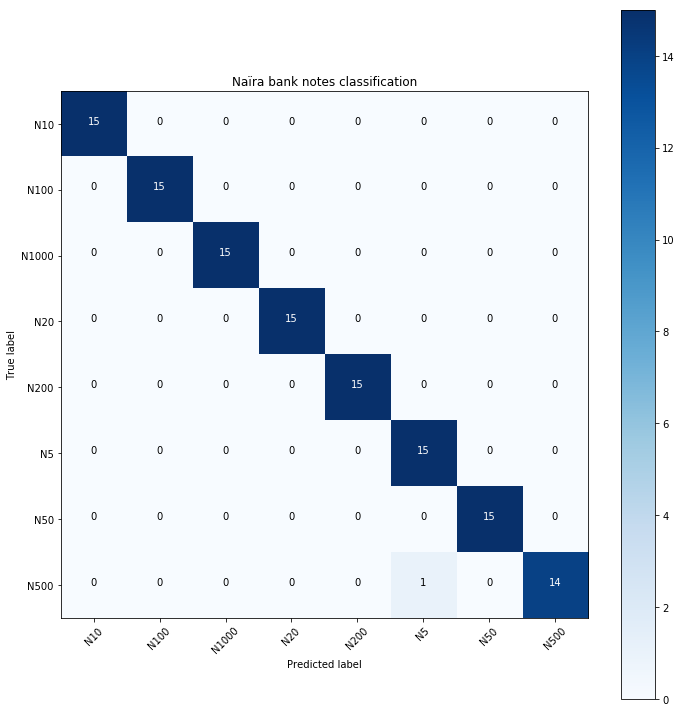

In [433]:
plot_confusion_matrix(model_conf_matrix, data.classes, figsize=(10, 10), title = 'Naïra bank notes classification')

In [334]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds_da == data.val_y)==is_correct)

In [335]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probabilities_da = [probabilities_da[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probabilities_da)

In [336]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [337]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probabilities_da[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds_da == data.val_y)==is_correct) & (data.val_y == y), mult)

In [349]:
list_Notes_type = data.classes
list_Notes_type

['N10', 'N100', 'N1000', 'N20', 'N200', 'N5', 'N50', 'N500']

In [352]:
list_Notes_type[0], list_Notes_type[1], list_Notes_type[2], list_Notes_type[3], list_Notes_type[4], list_Notes_type[5], list_Notes_type[6], list_Notes_type[7]

('N10', 'N100', 'N1000', 'N20', 'N200', 'N5', 'N50', 'N500')

N10: Correctly classified 10 Naïra bank notes


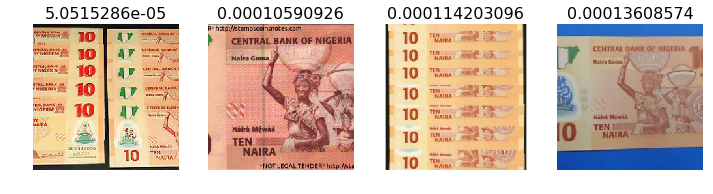

In [392]:
# 1. A few correct labels at random
plot_val_with_title(most_by_correct(0, True), "N10: Most Correctly classified 10 Naïra bank notes.")

N100: Correctly classified 100 Naïra bank notes


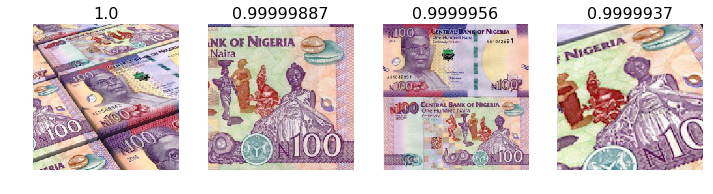

In [394]:
plot_val_with_title(most_by_correct(1, True), "N100: Most Correctly classified 100 Naïra bank notes")

N5: correctly classified 5 Naïra bank notes.


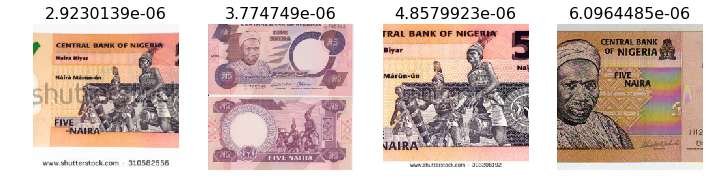

In [395]:
plot_val_with_title(most_by_correct(5, True), "N5: Most correctly classified 5 Naïra bank notes.")

N500: Most correctly classified 500 Naïra bank notes.


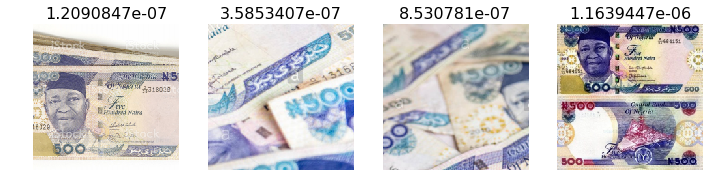

In [400]:
plot_val_with_title(most_by_correct(7, True), "N500: Most correctly classified 500 Naïra bank notes.")

N500: INCORRECTLY classified 500 Naïra bank note. It is actually the only incorrect classified one in the whole validation set as shown in the confusion matrix!!


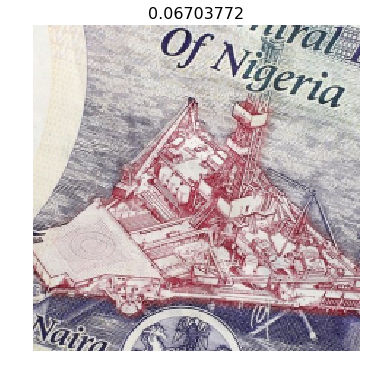

In [403]:
plot_val_with_title(most_by_correct(7, False), "N500: INCORRECTLY classified 500 Naïra bank note. It is actually the only incorrect classified one in the whole validation set as shown in the confusion matrix!!")